In [1]:
import sys
sys.path.insert(0, '..')  # Füge das übergeordnete Verzeichnis zum Python-Pfad hinzu
from utils_functions import to_float_array, df_d0, dataframe1


In [14]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
file1 = "1 mM Lactat Influx_PfFNT.csv"

df1 = pd.read_csv(file1, sep=';', decimal=',', skiprows=40, encoding='latin1')

# Ersetze "OVER" durch NaN in der gesamten DataFrame
df1 = df1.replace('OVER', np.nan)

time_raw = df1.iloc[3].iloc[1:]                       # alles nach der ersten Spalte
time_clean = (time_raw.astype(str)
                      .str.replace(r'[^\d,.\-]', '', regex=True)  # entferne alles außer Ziffern, Komma, Punkt, Minus
                      .str.replace(',', '.'))                    # komma -> punkt
time_floats = pd.to_numeric(time_clean, errors='coerce')         # nicht konvertierbare -> NaN
print(time_floats.values)
df1.iloc[3].iloc[1:]  = pd.Series(time_floats.values)
df1.head()


[  0.    8.2  16.5  24.7  32.9  41.1  49.4  57.6  65.8  74.   82.2  90.5
  98.7 106.9 115.1 123.4 131.6 139.8 148.  156.3 164.5 172.7 180.9 189.2
 197.4 205.6 213.8 222.1 230.3 238.5 246.7 255.  263.2 271.4 279.6 287.9
 296.1 304.3 312.5 320.8 329.  337.2 345.5 353.7 361.9 370.1 378.4 386.6
 394.8 403.  411.3 419.5 427.7 435.9 444.2 452.4 460.6 468.8 477.1 485.3
 493.5 501.7 510.  518.2 526.4 534.6 542.9 551.1 559.3 567.5 575.8 584.
 592.2 600.4]


/tmp/ipykernel_30454/2865796445.py:17: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df1.iloc[3].iloc[1:]  = pd.Series(time_floats.values)


,Unnamed: 0,"30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55",Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74
0,NaN,"56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Zyklus Nr.,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
3,Zeit [s],0.0,8.2,16.5,24.7,32.9,41.1,49.4,57.6,65.8,...,526.4,534.6,542.9,551.1,559.3,567.5,575.8,584.0,592.2,600.4
4,Temp. [øC],--,--,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--


In [15]:
Kontrolle_Lactat = dataframe1(df1, 3, 5, 6, 7)
Kontrolle_Hepes = dataframe1(df1, 3, 8, 9, 10)
MCT1 = dataframe1(df1, 3, 11, 12, 13)
Kontrolle_Lactat.head()

,Time,1.Messung,2.Messung,3.Messung,Mittelwerte,Standardabweichung
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,8.2,0.018864,-0.003013,-0.002852,0.004333,0.012584
2,16.5,0.039248,0.010941,0.000396,0.016862,0.020091
3,24.7,0.036415,0.020772,0.039772,0.032320,0.010140
4,32.9,0.028883,0.022041,0.033592,0.028172,0.005808


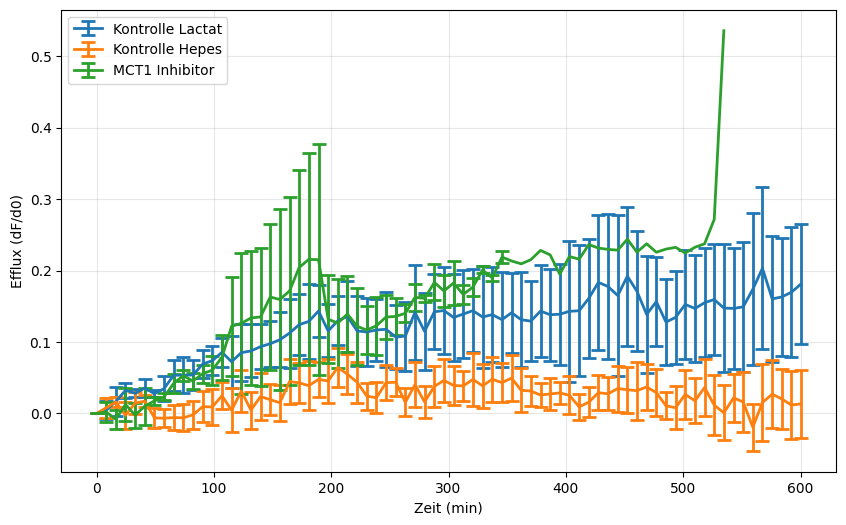

In [16]:
plt.figure(figsize=(10, 6))

# Kontrolle Lactat
plt.errorbar(Kontrolle_Lactat["Time"], Kontrolle_Lactat["Mittelwerte"], 
             yerr=Kontrolle_Lactat["Standardabweichung"],
             label="Kontrolle Lactat", linewidth=2, capsize=5, capthick=2)

# Kontrolle Hepes
plt.errorbar(Kontrolle_Hepes["Time"], Kontrolle_Hepes["Mittelwerte"],
             yerr=Kontrolle_Hepes["Standardabweichung"],
             label="Kontrolle Hepes", linewidth=2, capsize=5, capthick=2)

# MCT1
plt.errorbar(MCT1["Time"], MCT1["Mittelwerte"],
             yerr=MCT1["Standardabweichung"],
             label="MCT1 Inhibitor", linewidth=2, capsize=5, capthick=2)

plt.xlabel("Zeit (min)")
plt.ylabel("Efflux (dF/d0)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
